In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

In [24]:
def inception_module(input_tensor, filters_1x1, filters_3x3, filters_5x5, filters_pool):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(input_tensor)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(input_tensor)
    
    max_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, max_pool])

    return output

def inception_module_1_1_added(input_tensor, filters_1x1, filters_3x3, filters_5x5, filters_pool):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(input_tensor)

    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(input_tensor)
    conv_3x3 = Conv2D(filters_3x3/2, (1, 1), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(input_tensor)
    conv_5x5 = Conv2D(filters_5x5/2, (1, 1), padding='same', activation='relu')(conv_5x5)
    
    max_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    max_pool = Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(max_pool)

    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, max_pool])

    return output

In [25]:

input_tensor = Input(shape=(224, 224, 3))
output_tensor = inception_module(input_tensor, 64, 128, 32, 32)

model = Model(inputs=input_tensor, outputs=output_tensor)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 224, 224, 64  256         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_37 (Conv2D)             (None, 224, 224, 12  3584        ['input_9[0][0]']                
                                8)                                                          

In [26]:

input_tensor = Input(shape=(224, 224, 3))
output_tensor2 = inception_module_1_1_added(input_tensor, 64, 128, 32, 32)

model2 = Model(inputs=input_tensor, outputs=output_tensor2)
model2.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_40 (Conv2D)             (None, 224, 224, 12  3584        ['input_10[0][0]']               
                                8)                                                                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 224, 224, 32  2432        ['input_10[0][0]']               
                                )                                                           

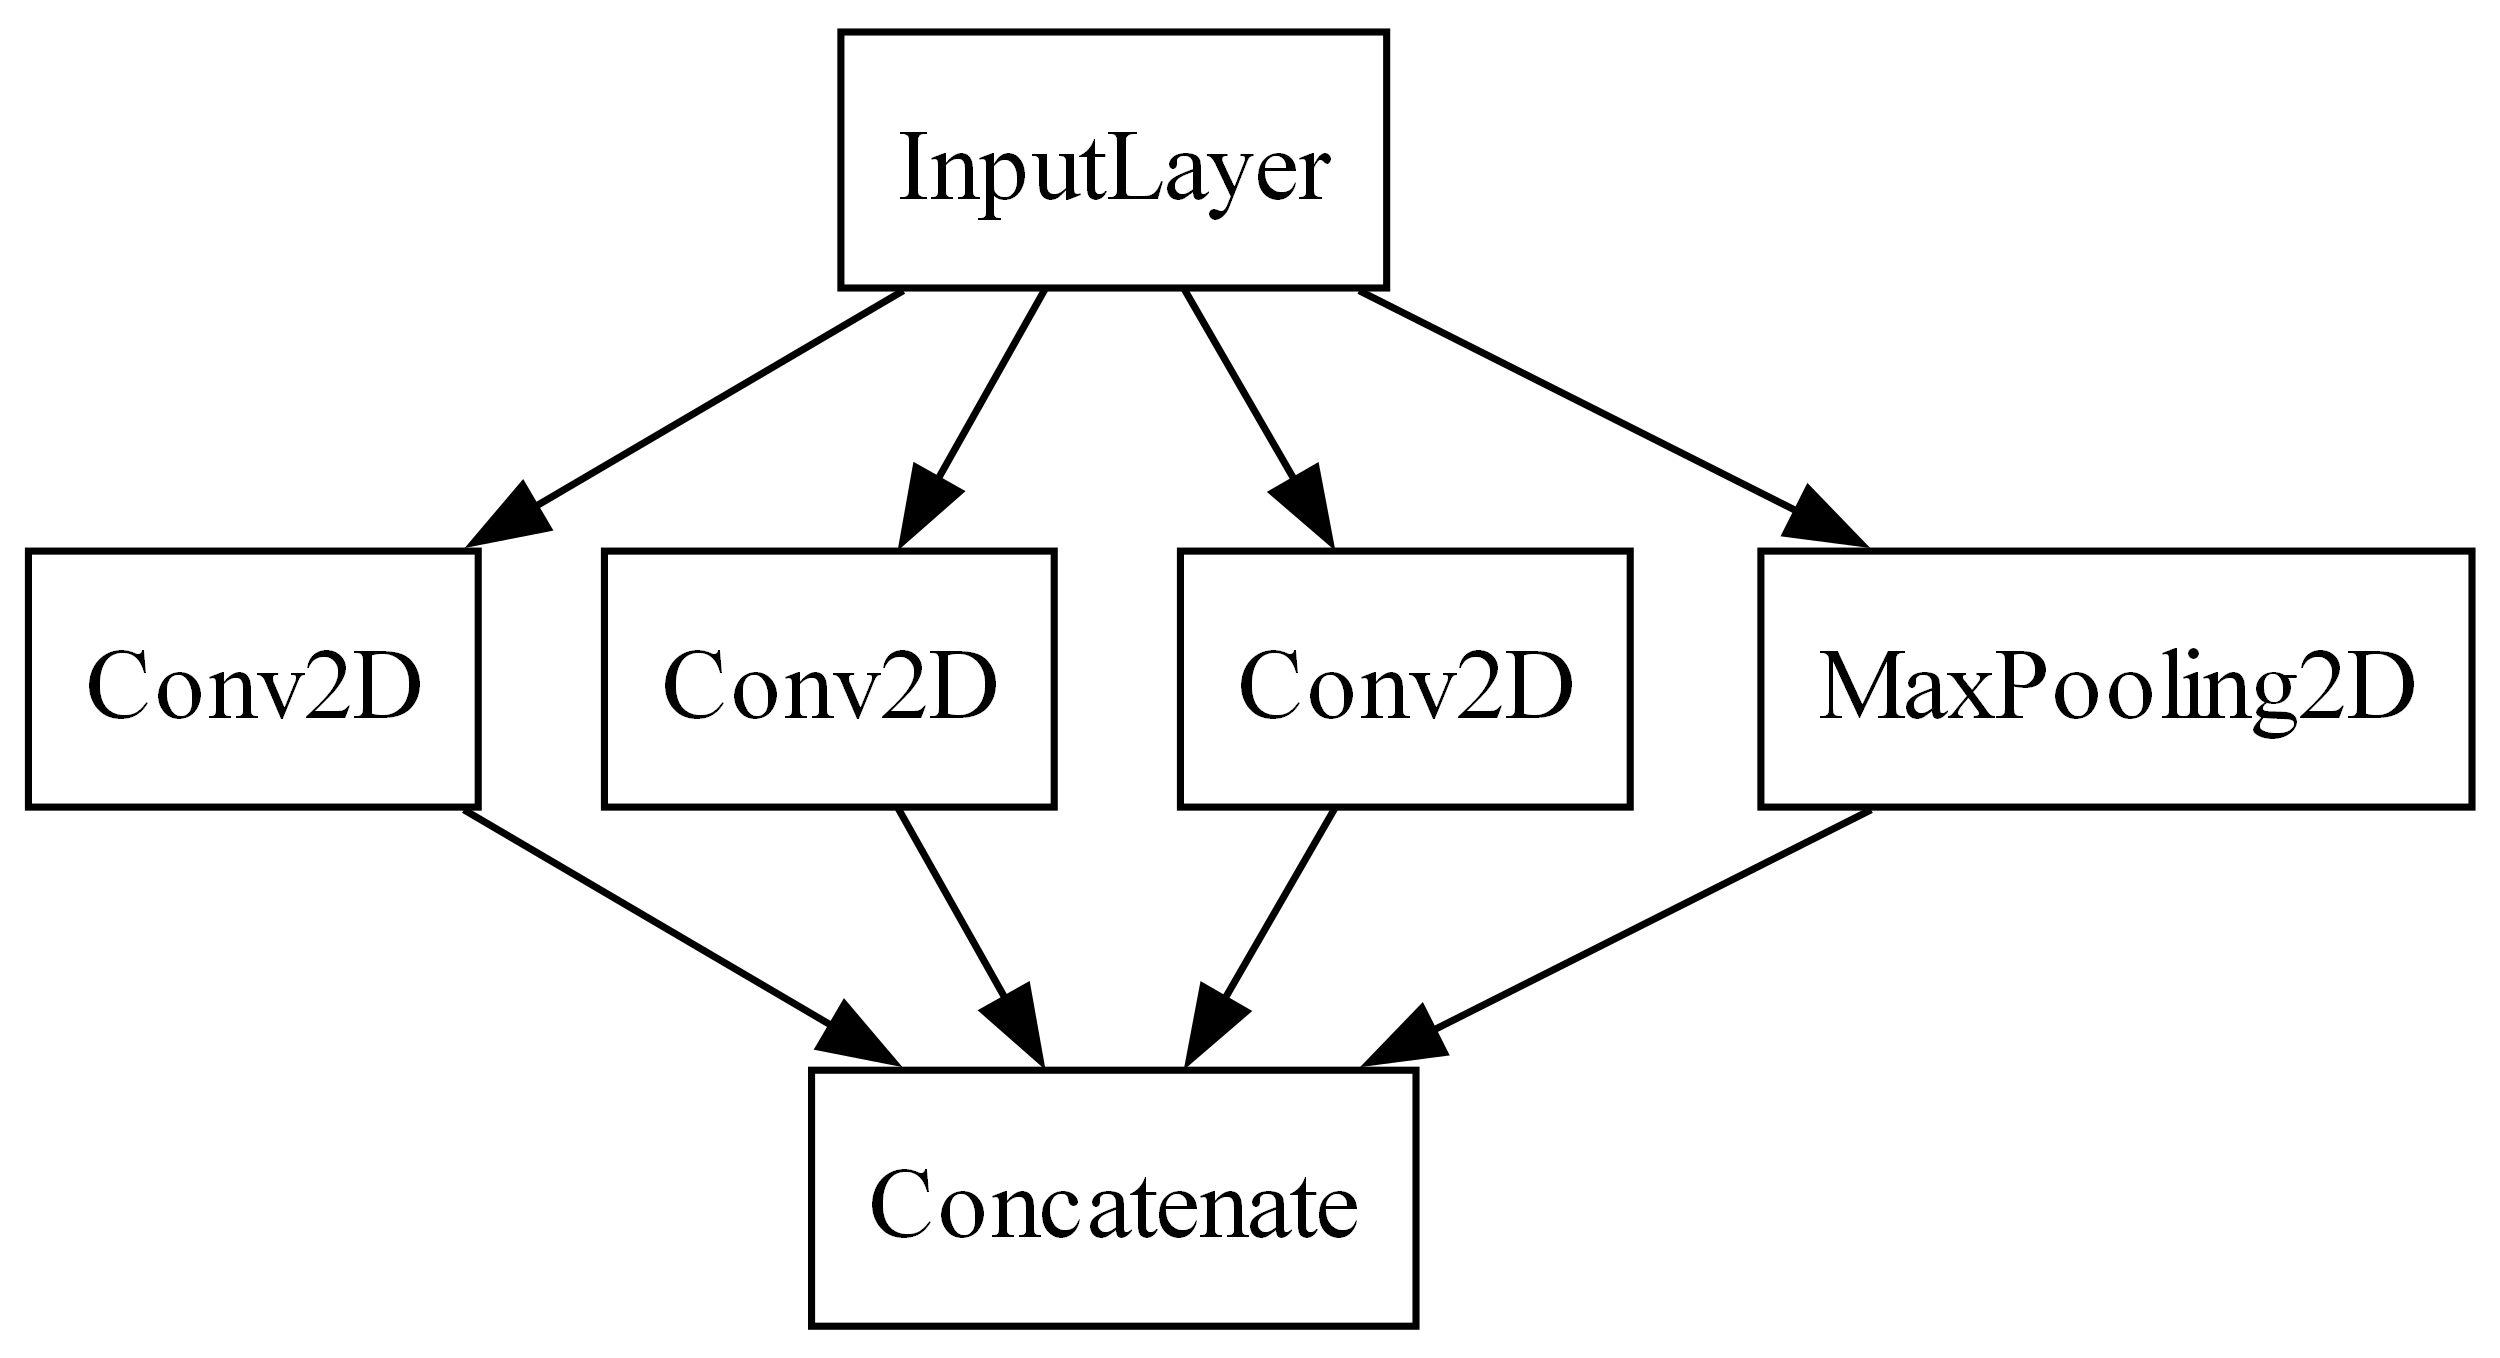

In [27]:
from keras.utils import plot_model

# Ensure `model` is defined and built
plot_model(model, to_file="model.png", show_shapes=False, show_layer_names=False,
    rankdir="TB", expand_nested=False, dpi=512,
    show_layer_activations=False,)

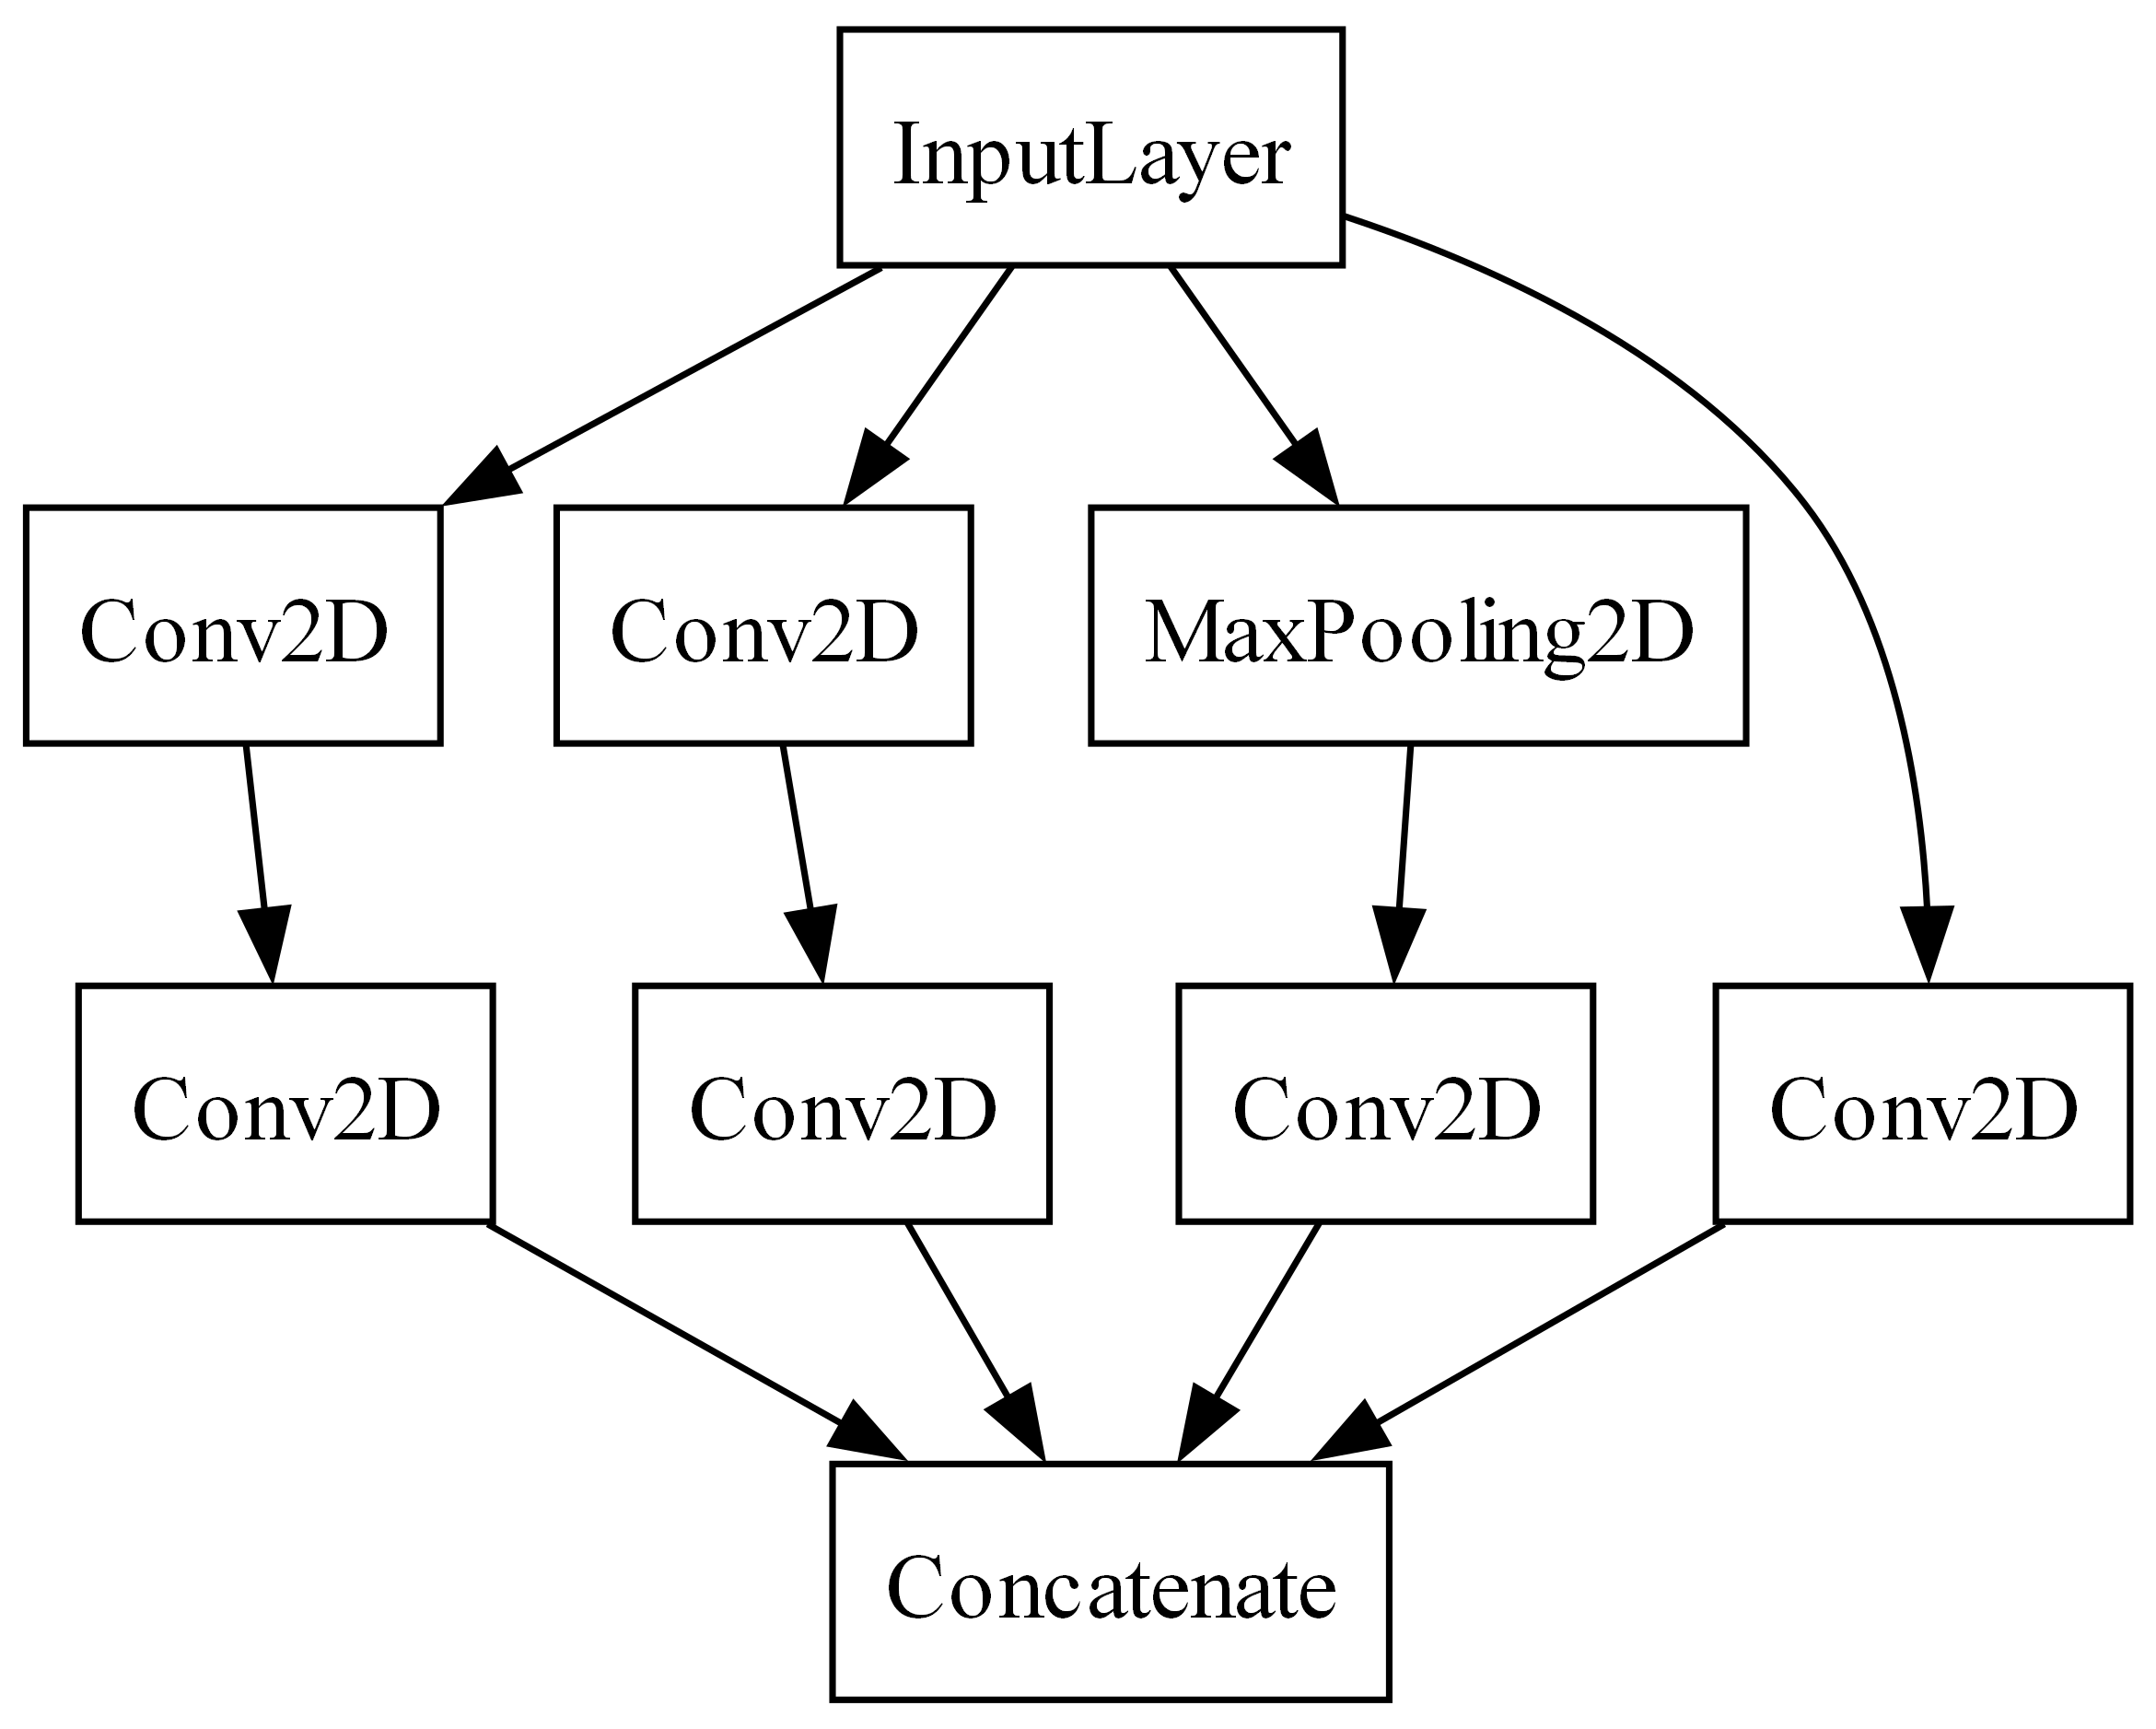

In [28]:

# Ensure `model` is defined and built
plot_model(model2, to_file="model.png", show_shapes=False, show_layer_names=False,
    rankdir="TB", expand_nested=False, dpi=512,
    show_layer_activations=False,)

In [52]:
input_tensor = Input(shape=(224, 224, 3))
output_tensor3 = inception_module_1_1_added(input_tensor, 64, 128, 32, 32)
output_tensor3 = inception_module_1_1_added(output_tensor3, 64, 128, 32, 32)

model3 = Model(inputs=input_tensor, outputs=output_tensor3)
model3.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_316 (Conv2D)            (None, 224, 224, 12  3584        ['input_21[0][0]']               
                                8)                                                                
                                                                                                  
 conv2d_318 (Conv2D)            (None, 224, 224, 32  2432        ['input_21[0][0]']               
                                )                                                          

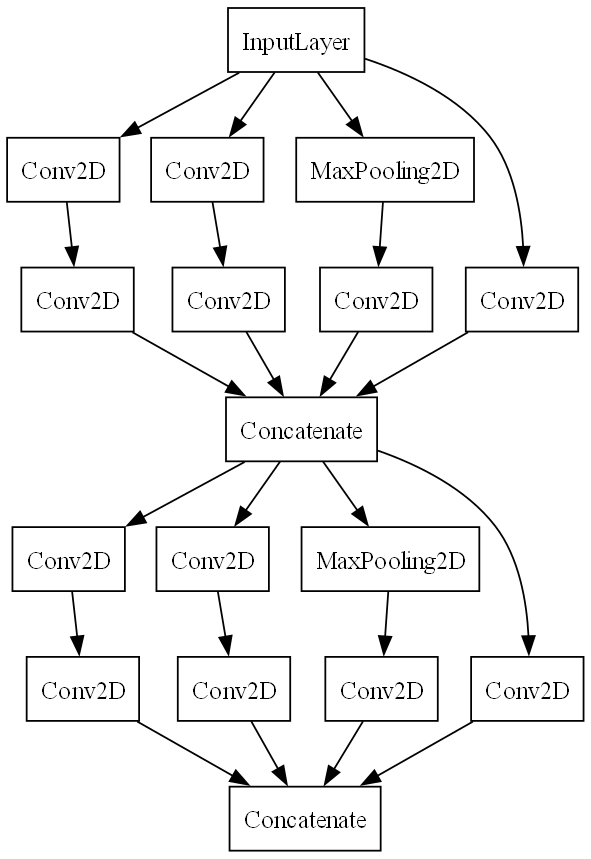

In [54]:
from tensorflow.keras.utils import plot_model

plot_model(model3, to_file="model.png", show_shapes=False, show_layer_names=False,
    rankdir="TB", expand_nested=False, dpi=128,
    show_layer_activations=False,)